##Check out thr GPU

In [1]:
!nvidia-smi  -L

GPU 0: Tesla T4 (UUID: GPU-43534f72-ebf8-3077-6a2a-4fc7cda7bdd8)


##Get the Helper Funcitons

load the script from the github

In [2]:
#download script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-08-02 07:43:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-08-02 07:43:26 (96.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
#import series of helper fucntions
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

##Use Tenserflow datasets

In [4]:
#get tensorflow datasets
import tensorflow_datasets as tfds


In [6]:
#list all datasets
datasets_list =tfds.list_builders()
print("food101" in datasets_list)

True


In [8]:
#load in the data
(train_data,test_data),ds_info =tfds.load(name="food101",
                                          split=["train","validation"],
                                          shuffle_files=True,
                                          as_supervised=True,
                                          with_info=True)

In [9]:
#features of the dataset
ds_info

tfds.core.DatasetInfo(
    name='food101',
    version=2.0.0,
    description='This dataset consists of 101 food categories, with 101'000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.',
    homepage='https://www.vision.ee.ethz.ch/datasets_extra/food-101/',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
    }),
    total_num_examples=101000,
    splits={
        'train': 75750,
        'validation': 25250,
    },
    supervised_keys=('image', 'label'),
    citation="""@inproceedings{bossard14,
      title = {Food-101 -- Mining Discriminative Components with Random Forests},
      

In [10]:
#get the classnames
class_names=ds_info.features["label"].names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

##Explore the dataset

1.classnames

2.shae of input data(iamge tensors)

3.data type of input data

4.labels of input data(one-hot,label encode)

5.labels mactch up with the labels

In [13]:
#take one sample of train data
train_one_sample=train_data.take(1)


In [15]:
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [23]:
#output info with training set
for image,label in train_one_sample:
  print(f"""
  Image shape :{image.shape}
  Image datatype :{image.dtype}
  Traget Class from food101 :{label}
  class name :{class_names[label.numpy()]}


  """)


  Image shape :(512, 512, 3)
  Image datatype :<dtype: 'uint8'>
  Traget Class from food101 :17
  class name :cheese_plate


  


In [24]:
#image tensor look like
image

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 92,  55,  26],
        [102,  65,  36],
        [ 97,  58,  27],
        ...,
        [ 65,  17,  13],
        [ 64,  16,  12],
        [ 63,  15,  11]],

       [[ 87,  50,  21],
        [ 91,  55,  23],
        [ 94,  55,  24],
        ...,
        [ 64,  16,  12],
        [ 64,  16,  12],
        [ 64,  16,  12]],

       [[ 92,  56,  24],
        [ 82,  46,  14],
        [ 84,  45,  14],
        ...,
        [ 63,  16,  10],
        [ 64,  17,  11],
        [ 66,  19,  13]],

       ...,

       [[145,  75,  26],
        [142,  76,  26],
        [151,  93,  43],
        ...,
        [ 61,  14,   8],
        [ 60,  13,   7],
        [ 60,  13,   7]],

       [[142,  70,  20],
        [139,  71,  22],
        [140,  80,  30],
        ...,
        [ 60,  13,   7],
        [ 57,  12,   7],
        [ 56,  11,   6]],

       [[141,  67,  18],
        [140,  70,  21],
        [134,  72,  23],
        ...,
        [ 60,  13,   

In [25]:
#check the min and max
import tensorflow as tf
tf.reduce_min(image),tf.reduce_max(image)

(<tf.Tensor: shape=(), dtype=uint8, numpy=0>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>)

##Plot the image


(-0.5, 511.5, 511.5, -0.5)

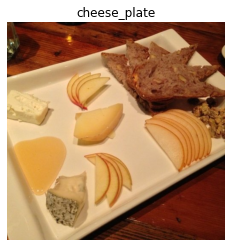

In [26]:
#plot the image from dataset
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(class_names[label.numpy()])
plt.axis(False)